In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import Series,DataFrame

In [172]:
data=pd.read_csv("house_prices_multivariate.csv")

In [173]:
Ny_housing=data.copy()

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X_train,X_test,y_train,y_test=train_test_split(data.iloc[:,:-1],data.SalePrice,test_size=.3,random_state=42)

In [197]:
from sklearn.linear_model import LinearRegression,LogisticRegression

In [85]:
lm=LinearRegression(fit_intercept=True,normalize=True)

In [86]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [177]:
from sklearn.metrics import mean_squared_error

In [88]:
predictions=lm.predict(X_test)
y_predict_train=lm.predict(X_train)

In [89]:
test_rmse=mean_squared_error(y_test,predictions)
train_rmse=mean_squared_error(y_train,y_predict_train)

In [90]:
print("Train Error: {} and Test error: {}".format(train_rmse,test_rmse))
print("Train Error: {} and Test error: {}".format(np.sqrt(train_rmse),np.sqrt(test_rmse)))

Train Error: 1183392244.3390577 and Test error: 1381347499.0615544
Train Error: 34400.46866452633 and Test error: 37166.48354447263


In [91]:
np.sqrt(test_rmse)/data.SalePrice.mean()

0.20038053419482804

In [178]:
from sklearn.preprocessing import PolynomialFeatures

In [179]:
from sklearn.pipeline import  make_pipeline,Pipeline

In [ ]:
# trying using Grid Search and RandomSearch to tune hyper parameters

In [204]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score
pipeline=Pipeline(steps=[('add_poly_feature',PolynomialFeatures()),
                         ('linear_regression',LinearRegression())])

In [209]:
params={'add_poly_feature__degree':[2,3,4]}

In [ ]:
gridsearch=GridSearchCV(estimator=pipeline,param_grid=params)
gridsearch.fit(X_train,y_train)

C:\Users\oj049\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [190]:
y_predict=gridsearch.predict(X_test)
cross_val_score(gridsearch.best_estimator_,X_train,y_train)

array([-2538.77449789,  -141.56419543,  -412.68893082])

In [184]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'add_poly_feature', 'linear_regression', 'add_poly_feature__degree', 'add_poly_feature__include_bias', 'add_poly_feature__interaction_only', 'linear_regression__copy_X', 'linear_regression__fit_intercept', 'linear_regression__n_jobs', 'linear_regression__normalize'])

In [94]:
# Taking degree 3

In [95]:
poly_model=make_pipeline(PolynomialFeatures(3),LinearRegression(normalize=True))

In [96]:
poly_model.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True))])

In [97]:
prediction=poly_model.predict(X_test)

In [98]:
y_predict_train=poly_model.predict(X_train)

In [99]:
test_rmse=mean_squared_error(y_test,prediction)
test_rmse_train=mean_squared_error(y_train,y_predict_train)

In [100]:
print("Train Error:{} and Test Error : {}".format(test_rmse_train,test_rmse))

Train Error:64839.378288839274 and Test Error : 6.846689307862761e+23


In [101]:
print("Train Error:{} and Test Error : {}".format(np.sqrt(test_rmse_train),np.sqrt(test_rmse)))

Train Error:254.63577574417792 and Test Error : 827447237463.6803


In [102]:
np.sqrt(test_rmse)/data.SalePrice.mean()

4461124.745971974

In [103]:
#Taking degree 4

In [104]:
poly_model=make_pipeline(PolynomialFeatures(4),LinearRegression())
poly_model.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [105]:
prediction=poly_model.predict(X_test)
y_predict_train=poly_model.predict(X_train)

In [106]:
test_rmse=mean_squared_error(y_test,prediction)
test_rmse_train=mean_squared_error(y_train,y_predict_train)

In [107]:
print("Train Error:{} and Test Error : {}".format(test_rmse_train,test_rmse))
print("Train Error:{} and Test Error : {}".format(np.sqrt(test_rmse_train),np.sqrt(test_rmse)))

Train Error:65099.531226515675 and Test Error : 588454741015084.0
Train Error:255.14609780773773 and Test Error : 24258086.09546689


In [108]:
np.sqrt(test_rmse)/data.SalePrice.mean()

130.7857991068054

In [109]:
#As Train error reducing and test error increasing till degree 3 that shows overfitting so will consider degree 3 further

In [110]:
from sklearn.linear_model import Lasso

In [111]:
#1st-- alpha=0.5

In [112]:
model=make_pipeline(PolynomialFeatures(3),Lasso(alpha=0.5))

In [113]:
model.fit(X_train,y_train)

C:\Users\oj049\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [114]:
prediction=model.predict(X_test)

[  0.00000000e+00   5.17359222e+02   1.46019760e+00 ...,   6.62574943e-09
   6.22752961e-07   1.07415128e-04]


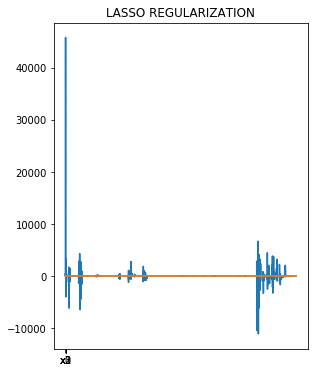

In [115]:
coef=model.steps[1][1].coef_
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(range(len(coef)),coef)
plt.plot(range(len(coef)),[0]*len(coef))
plt.xticks(range(4),('x0','x1','x2','x3'))
plt.title("LASSO REGULARIZATION")

print(coef)

In [116]:
test_rmse=mean_squared_error(y_test,prediction)
test_rmse_train=mean_squared_error(y_train,y_predict_train)

In [117]:
print("Train Error:{} and Test Error : {}".format(test_rmse_train,test_rmse))
print("Train Error:{} and Test Error : {}".format(np.sqrt(test_rmse_train),np.sqrt(test_rmse)))

Train Error:65099.531226515675 and Test Error : 70260617322.94629
Train Error:255.14609780773773 and Test Error : 265067.1939771995


In [118]:
np.sqrt(test_rmse)/data.SalePrice.mean()

1.4290915056066547

In [119]:
data.SalePrice.mean()

185479.511240029

In [120]:
model.steps[1][1].coef_

array([  0.00000000e+00,   5.17359222e+02,   1.46019760e+00, ...,
         6.62574943e-09,   6.22752961e-07,   1.07415128e-04])

In [127]:
coeff = DataFrame(X_train.columns)

coeff['Coefficient Estimate'] = Series(model.steps[1][1].coef_)

coeff

,0,Coefficient Estimate
0,LotFrontage,0.000000e+00
1,LotArea,6.137782e+19
2,OverallQual,-1.539427e+21
3,OverallCond,-2.746649e+18
4,YearBuilt,4.914272e+18
5,YearRemodAdd,1.356868e+19
6,MasVnrArea,-2.076385e+17
7,BsmtFinSF1,-6.204021e+19
8,BsmtFinSF2,-1.534909e+19
9,BsmtUnfSF,8.089316e+18


In [121]:
# Now Try with Ridge for same alpha value

In [122]:
from sklearn.linear_model import Ridge
model=make_pipeline(PolynomialFeatures(3),Ridge(alpha=0.5))
model.fit(X_train,y_train)
prediction=model.predict(X_test)

C:\Users\oj049\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.2980545928462523e-46
  ' condition number: {}'.format(rcond), RuntimeWarning)


In [123]:
model.steps[1][1].coef_

array([  0.00000000e+00,   6.13778249e+19,  -1.53942669e+21, ...,
        -4.32919313e+25,  -4.77391802e+25,   2.37565368e+26])

In [126]:
coeff = DataFrame(X_train.columns)

coeff['Coefficient Estimate'] = Series(model.steps[1][1].coef_)

coeff

,0,Coefficient Estimate
0,LotFrontage,0.000000e+00
1,LotArea,6.137782e+19
2,OverallQual,-1.539427e+21
3,OverallCond,-2.746649e+18
4,YearBuilt,4.914272e+18
5,YearRemodAdd,1.356868e+19
6,MasVnrArea,-2.076385e+17
7,BsmtFinSF1,-6.204021e+19
8,BsmtFinSF2,-1.534909e+19
9,BsmtUnfSF,8.089316e+18


In [ ]:
#This signifies coefficients are very less almost equal to 0

In [128]:
test_rmse=mean_squared_error(y_test,prediction)
test_rmse_train=mean_squared_error(y_train,y_predict_train)

In [129]:
print("Train Error:{} and Test Error : {}".format(test_rmse_train,test_rmse))
print("Train Error:{} and Test Error : {}".format(np.sqrt(test_rmse_train),np.sqrt(test_rmse)))

Train Error:65099.531226515675 and Test Error : 9.05134091089015e+84
Train Error:255.14609780773773 and Test Error : 3.008544649974494e+42


In [130]:
np.sqrt(test_rmse)/data.SalePrice.mean()

1.6220361105443806e+37

In [131]:
# Above error is approx. 0.16 % of actual data. This signifies Ridge with this alpha value fitting data best and giving best accurate model

In [ ]:
# now consider elastic net

In [132]:
from sklearn.linear_model import ElasticNet
model=make_pipeline(PolynomialFeatures(3),ElasticNet(alpha=0.5,l1_ratio=0.5))
model.fit(X_train,y_train)
prediction=model.predict(X_test)

C:\Users\oj049\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [133]:
model.steps[1][1].coef_

array([  0.00000000e+00,   4.31826313e+02,   1.60354829e+00, ...,
         6.09411250e-09,   5.86102779e-07,   1.08472678e-04])

In [134]:
coeff = DataFrame(X_train.columns)

coeff['Coefficient Estimate'] = Series(model.steps[1][1].coef_)

coeff

,0,Coefficient Estimate
0,LotFrontage,0.000000
1,LotArea,431.826313
2,OverallQual,1.603548
3,OverallCond,17.992317
4,YearBuilt,-0.366812
5,YearRemodAdd,932.138804
6,MasVnrArea,549.260917
7,BsmtFinSF1,124.301619
8,BsmtFinSF2,22.364854
9,BsmtUnfSF,13.973451


In [135]:
test_rmse=mean_squared_error(y_test,prediction)
test_rmse_train=mean_squared_error(y_train,y_predict_train)

In [136]:
print("Train Error:{} and Test Error : {}".format(test_rmse_train,test_rmse))
print("Train Error:{} and Test Error : {}".format(np.sqrt(test_rmse_train),np.sqrt(test_rmse)))

Train Error:65099.531226515675 and Test Error : 67200699588.76087
Train Error:255.14609780773773 and Test Error : 259230.97729392


In [137]:
np.sqrt(test_rmse)/data.SalePrice.mean()

1.397625945641237

# This signifies much greater as compared to we get from Ridge with same alpha value..So for atleast this alpha value we can conclude Ridge Penalisation is best to fit model

In [138]:
#2nd- Now alpha= 1

In [139]:
model=make_pipeline(PolynomialFeatures(3),Lasso(alpha=1))

In [140]:
model.fit(X_train,y_train)

C:\Users\oj049\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [141]:
prediction=model.predict(X_test)

In [142]:
test_rmse=mean_squared_error(y_test,prediction)
test_rmse_train=mean_squared_error(y_train,y_predict_train)

In [143]:
print("Train Error:{} and Test Error : {}".format(test_rmse_train,test_rmse))
print("Train Error:{} and Test Error : {}".format(np.sqrt(test_rmse_train),np.sqrt(test_rmse)))

Train Error:65099.531226515675 and Test Error : 71977227758.63048
Train Error:255.14609780773773 and Test Error : 268285.7203777914


In [144]:
np.sqrt(test_rmse)/data.SalePrice.mean()

1.4464439688467956

In [145]:
model.steps[1][1].coef_

array([  0.00000000e+00,   5.16315052e+02,   1.46190906e+00, ...,
         6.64955586e-09,   6.23292151e-07,   1.03751008e-04])

In [146]:
#now try with Ridge

In [147]:
from sklearn.linear_model import Ridge
model=make_pipeline(PolynomialFeatures(3),Ridge(alpha=1))
model.fit(X_train,y_train)
prediction=model.predict(X_test)

C:\Users\oj049\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.2980545928462523e-46
  ' condition number: {}'.format(rcond), RuntimeWarning)


In [152]:
test_rmse=mean_squared_error(y_test,prediction)
train_rmse=mean_squared_error(y_train,y_predict_train)

In [153]:
print("Train Error:{} and Test Error : {}".format(test_rmse_train,test_rmse))
print("Train Error:{} and Test Error : {}".format(np.sqrt(test_rmse_train),np.sqrt(test_rmse)))

Train Error:65099.531226515675 and Test Error : 9.05134091089015e+84
Train Error:255.14609780773773 and Test Error : 3.008544649974494e+42


In [154]:
np.sqrt(test_rmse)/data.SalePrice.mean()

1.6220361105443806e+37

In [155]:
# Elastic net(alpha=0.1)

In [156]:
from sklearn.linear_model import ElasticNet
model=make_pipeline(PolynomialFeatures(3),ElasticNet(alpha=1,l1_ratio=0.6))
model.fit(X_train,y_train)
prediction=model.predict(X_test)

C:\Users\oj049\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [157]:
test_rmse=mean_squared_error(y_test,prediction)
train_rmse=mean_squared_error(y_train,y_predict_train)

In [158]:
print("Train Error:{} and Test Error : {}".format(train_rmse,test_rmse))
print("Train Error:{} and  Test Error : {}".format(np.sqrt(train_rmse),np.sqrt(test_rmse)))

Train Error:65099.531226515675 and Test Error : 62698225976.28527
Train Error:255.14609780773773 and  Test Error : 250396.1381017792


In [159]:
np.sqrt(test_rmse)/data.SalePrice.mean()

1.3499935191102674

In [160]:
model.score(X_test,y_test)

-9.38581228444035

In [145]:
#alpha=2

In [161]:
model=make_pipeline(PolynomialFeatures(5),ElasticNet(alpha=2))
model.fit(X_train,y_train)
prediction=model.predict(X_test)

In [147]:
test_rmse=mean_squared_error(y_test,prediction)
train_rmse=mean_squared_error(y_train,y_predict_train)

In [148]:
print("Train Error:{} and Test Error : {}".format(train_rmse,test_rmse))
print("Train Error:{} and  Test Error : {}".format(np.sqrt(train_rmse),np.sqrt(test_rmse)))

Train Error:64839.38054336785 and Test Error : 56630084145.43719
Train Error:254.63578017114534 and  Test Error : 237970.76321564626


In [149]:
np.sqrt(test_rmse)/data.SalePrice.mean()

1.2830029668758849